# **Classification of Delayed Flight for Improving Airline Efficiency**

# **Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

# Set seaborn style for better visuals
sns.set(style='whitegrid', palette='muted')

#Loading Dataset
df = pd.read_csv('/content/AssignmentTrain.csv')
df.head(10)

df.drop('Unnamed: 0' , axis=1, inplace=True)
df.drop('id' , axis=1 , inplace=True)

df["Deley_Label"] = df["Delay"].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
df["Deley_Label"].value_counts()

,count
Deley_Label,
0,58668
1,45236


In [ ]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Delay,Arrival Delay in Minutes,Deley_Label
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.435363
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495807
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [ ]:
# Assuming the DataFrame is already loaded as 'df'
# If not, uncomment and adjust the following line:
# df = pd.read_csv('path_to_your_dataset.csv')  # Replace with actual path

# Set seaborn style for better visuals
sns.set(style='whitegrid', palette='muted')

# 1. Initial Data Inspection
print("=== DataFrame Info ===")
df.info()
print("\n=== First 5 Rows ===")
print(df.head())
print("\n=== Data Types ===")
print(df.dtypes)
print("\n=== Shape ===")
print(df.shape)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding 


=== Missing Values Summary ===
Arrival Delay in Minutes    310
dtype: int64


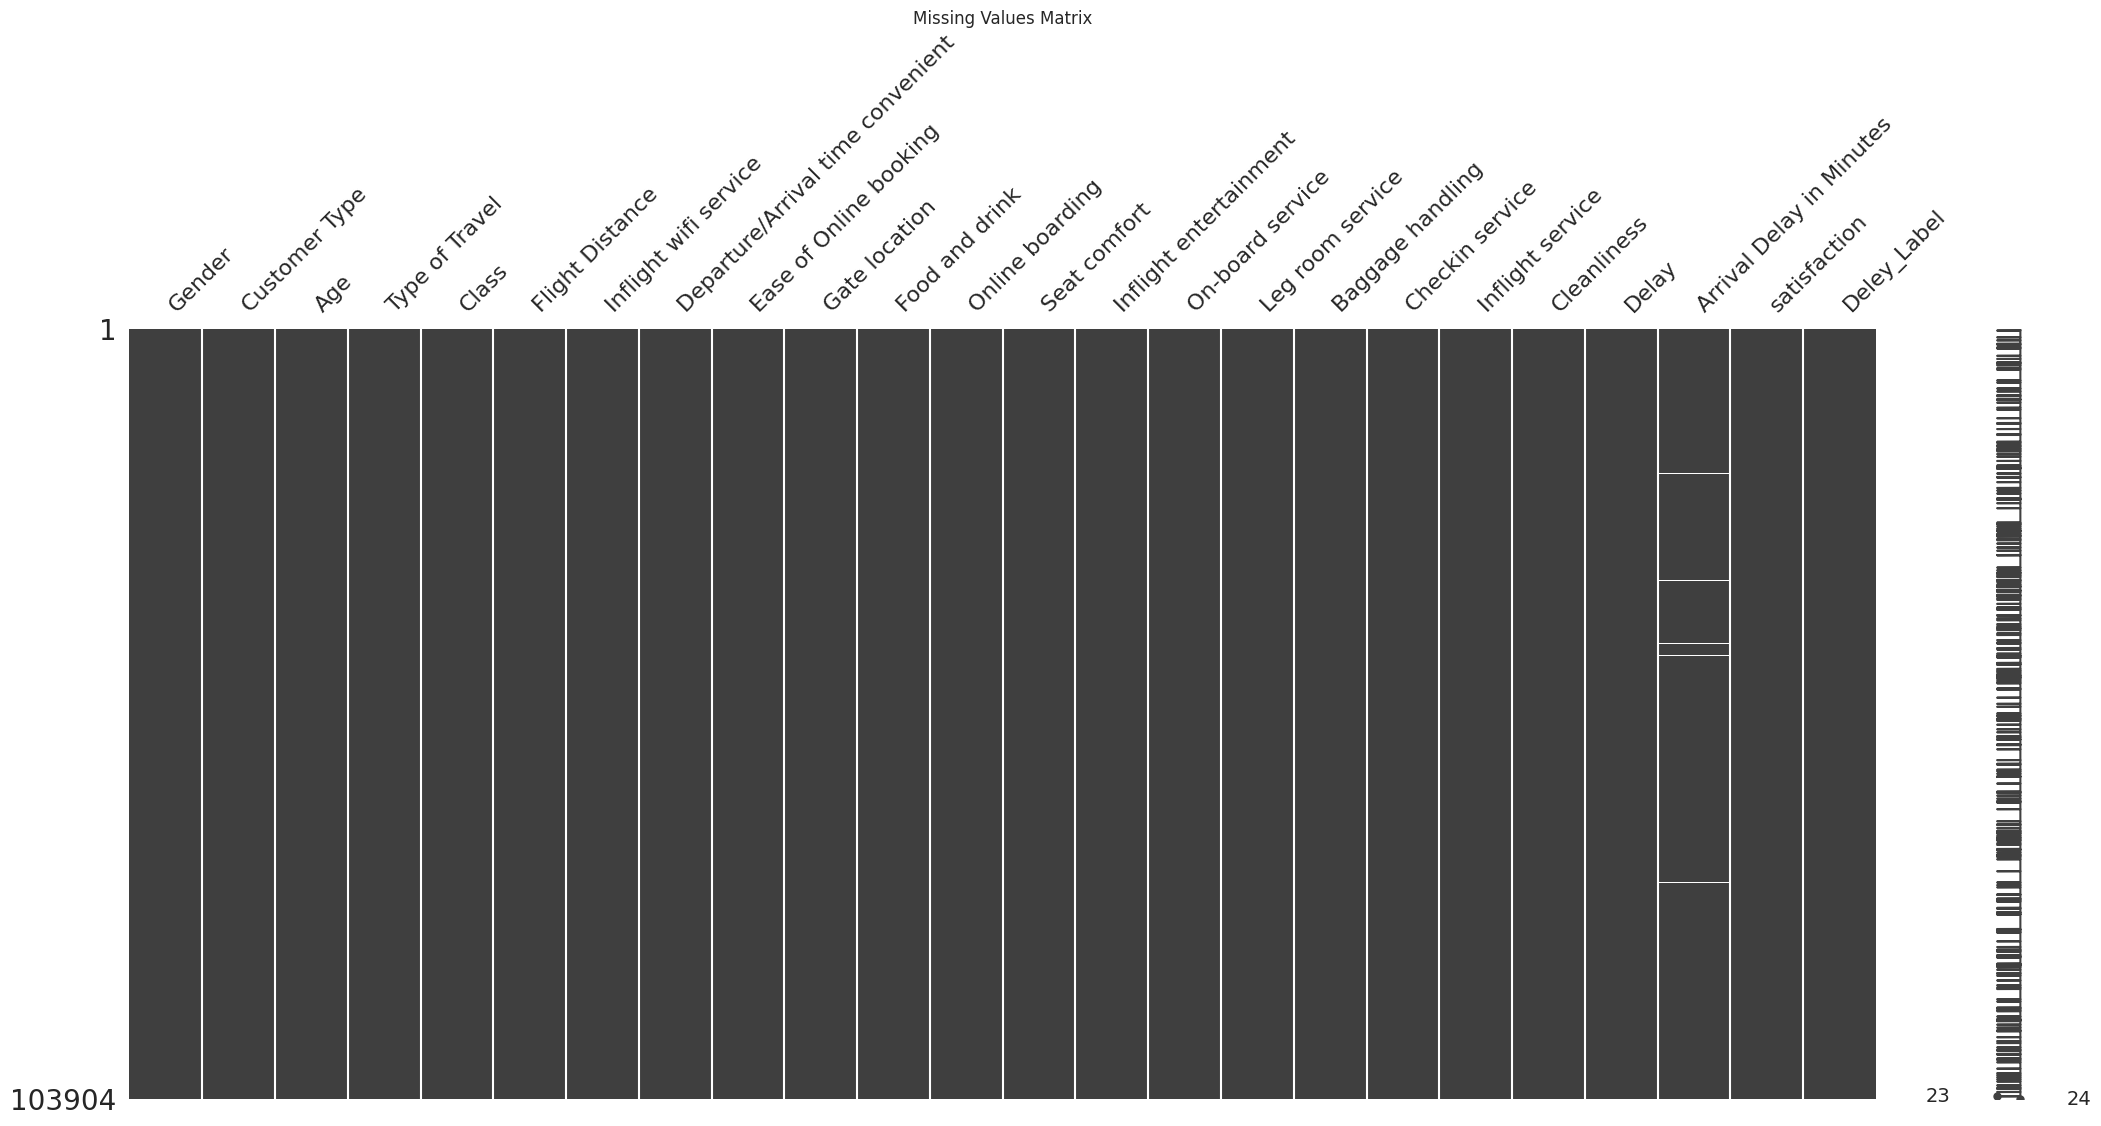

Imputed 'Arrival Delay in Minutes' with median: 0.0

Number of duplicate rows: 0


/tmp/ipython-input-3484527554.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [ ]:
# 2. Handling Missing Values
print("\n=== Missing Values Summary ===")
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary[missing_summary > 0])

# Visualize missing values
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute numerical missing values with median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Imputed '{col}' with median: {median_val}")

# Impute categorical missing values with mode (most frequent value)
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Imputed '{col}' with mode: {mode_val}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)

In [ ]:

# 3. Summary Statistics
print("\n=== Descriptive Statistics for Numerical Features ===")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numerical_cols].describe().T)

print("\n=== Descriptive Statistics for Categorical Features ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts(normalize=True) * 100)


=== Descriptive Statistics for Numerical Features ===
                                      count         mean         std   min  \
Age                                103904.0    39.379706   15.114964   7.0   
Flight Distance                    103904.0  1189.448375  997.147281  31.0   
Inflight wifi service              103904.0     2.729683    1.327829   0.0   
Departure/Arrival time convenient  103904.0     3.060296    1.525075   0.0   
Ease of Online booking             103904.0     2.756901    1.398929   0.0   
Gate location                      103904.0     2.976883    1.277621   0.0   
Food and drink                     103904.0     3.202129    1.329533   0.0   
Online boarding                    103904.0     3.250375    1.349509   0.0   
Seat comfort                       103904.0     3.439396    1.319088   0.0   
Inflight entertainment             103904.0     3.358158    1.332991   0.0   
On-board service                   103904.0     3.382363    1.288354   0.0   
Leg room 

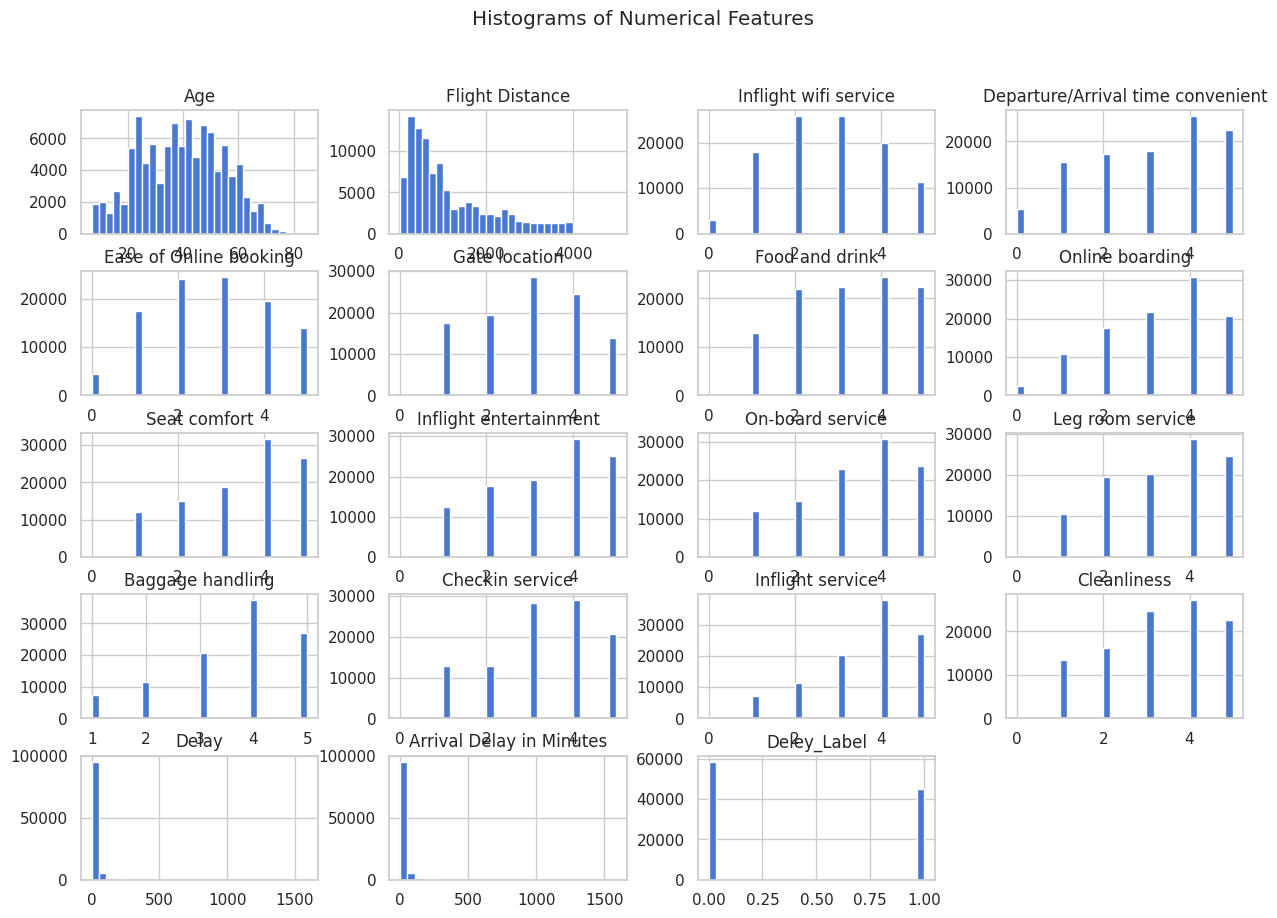

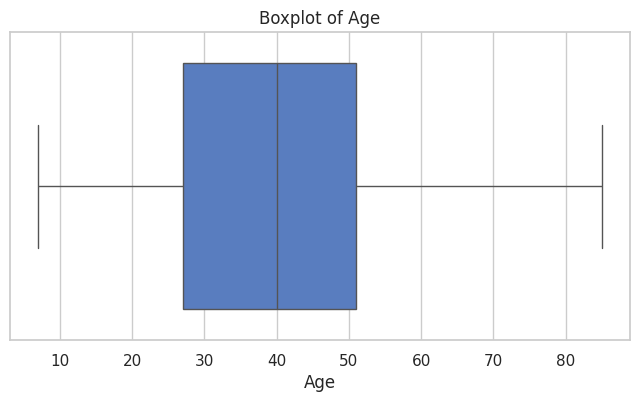

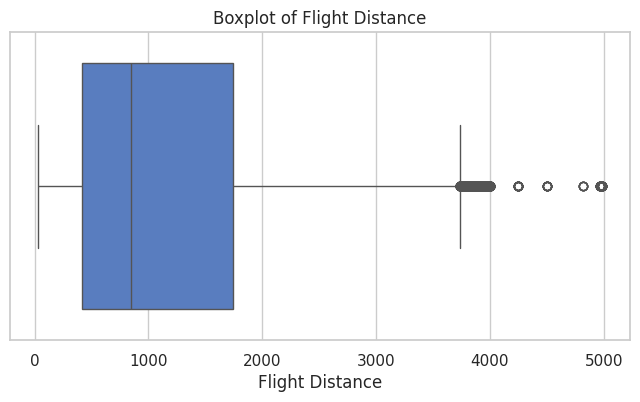

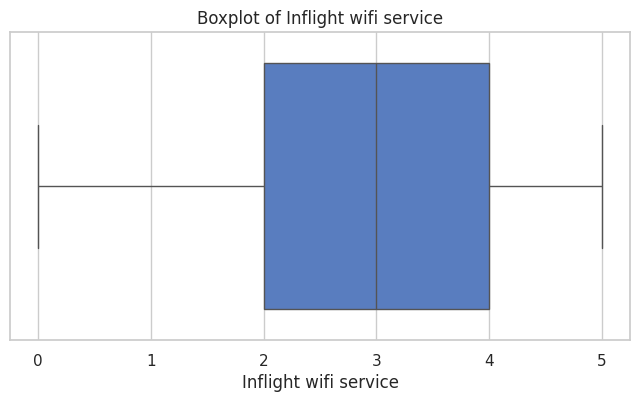

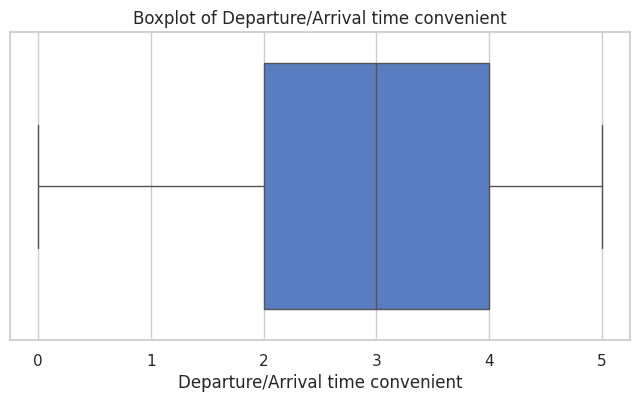

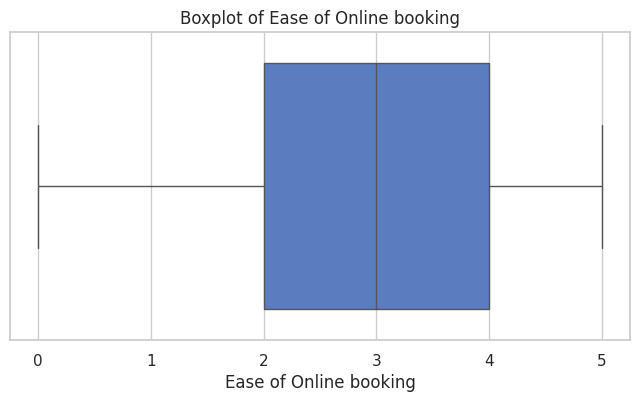

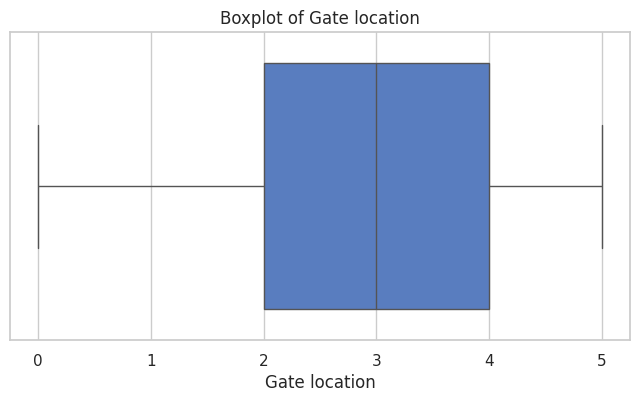

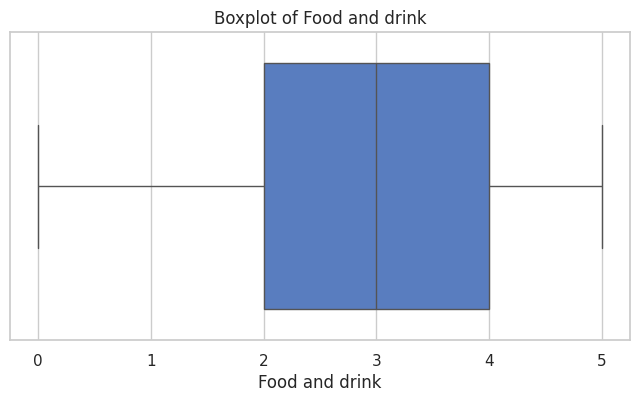

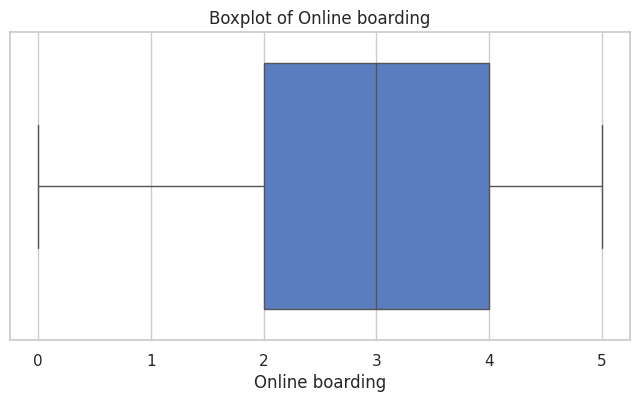

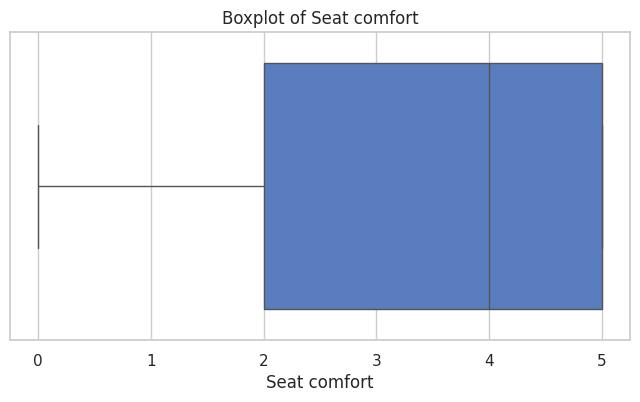

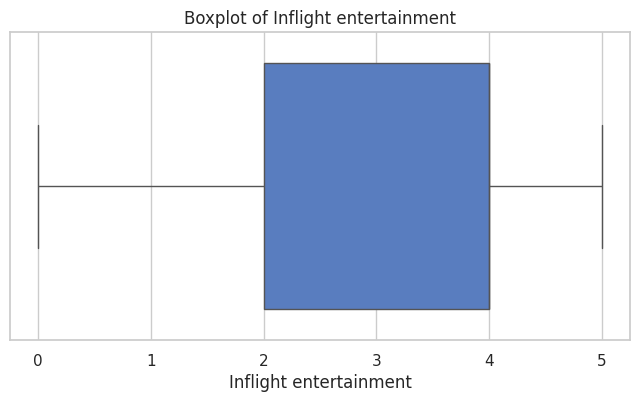

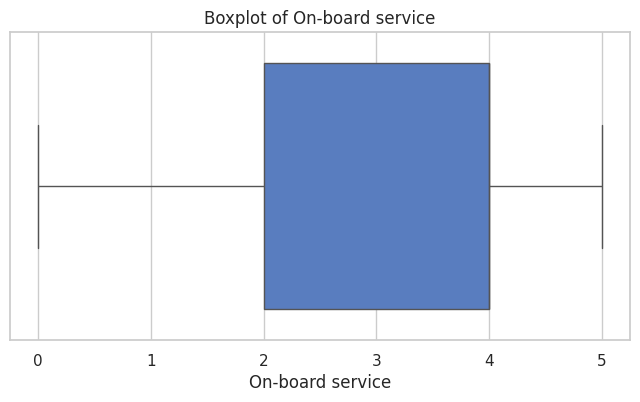

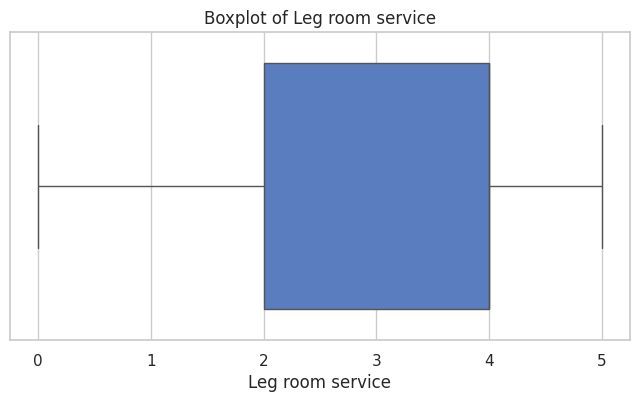

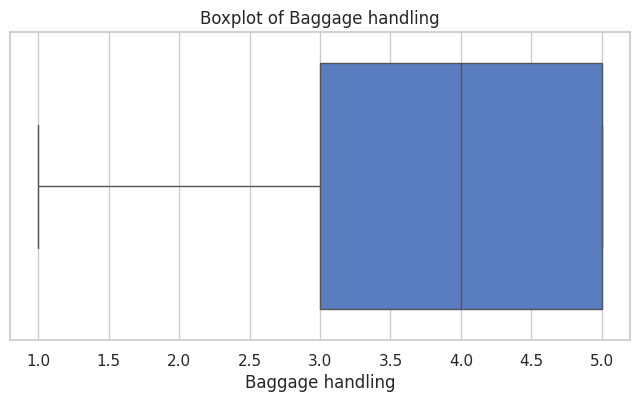

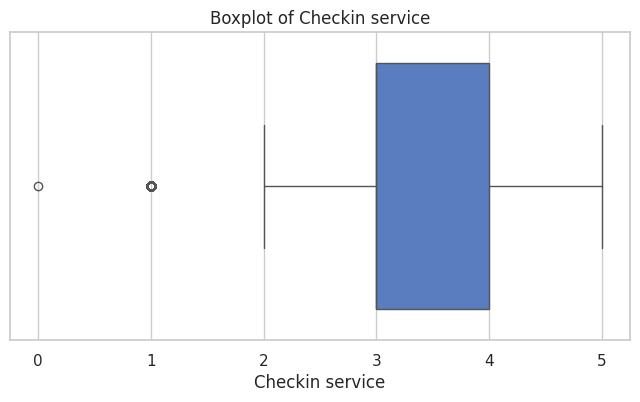

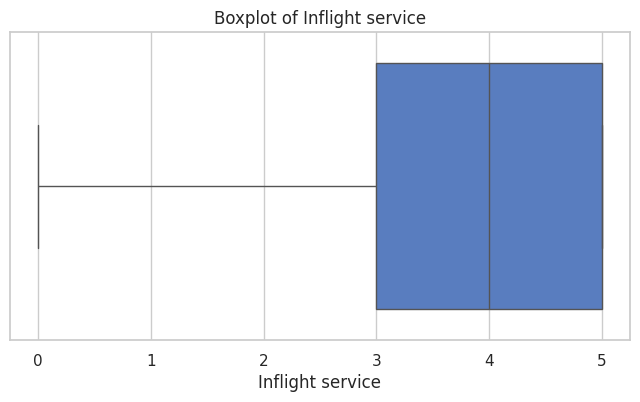

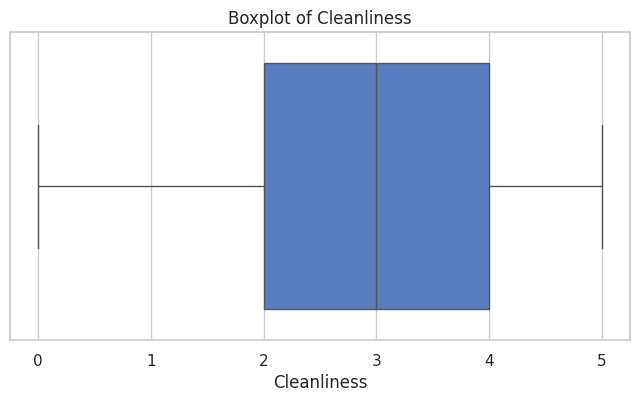

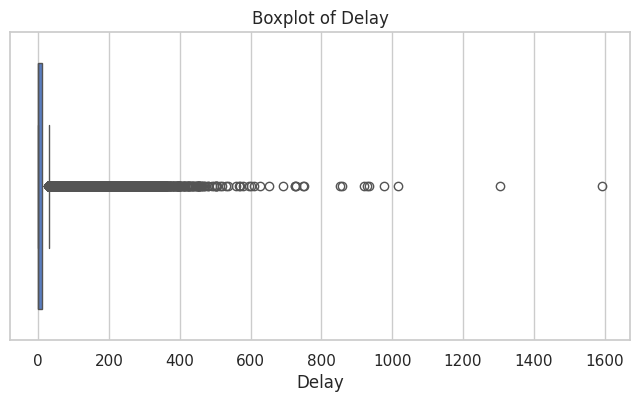

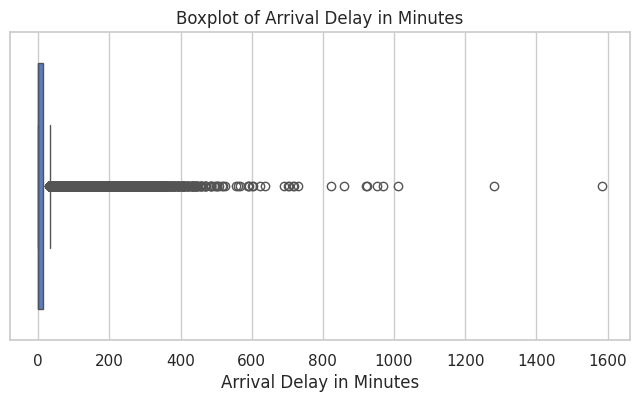

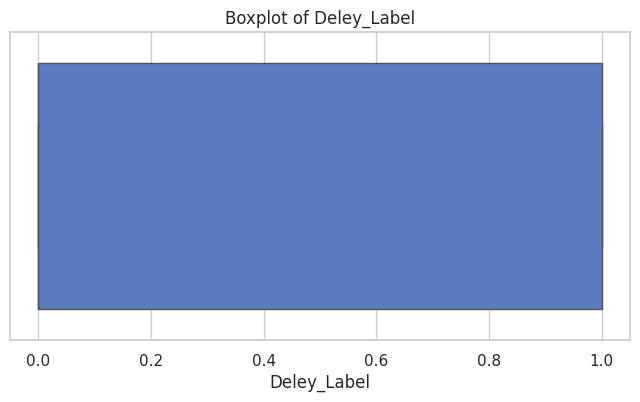

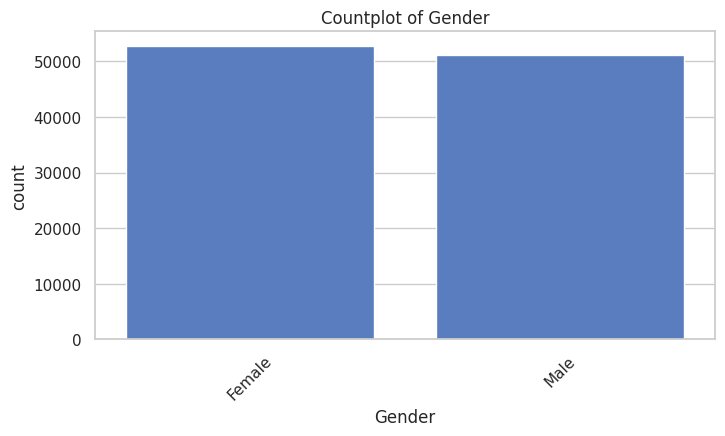

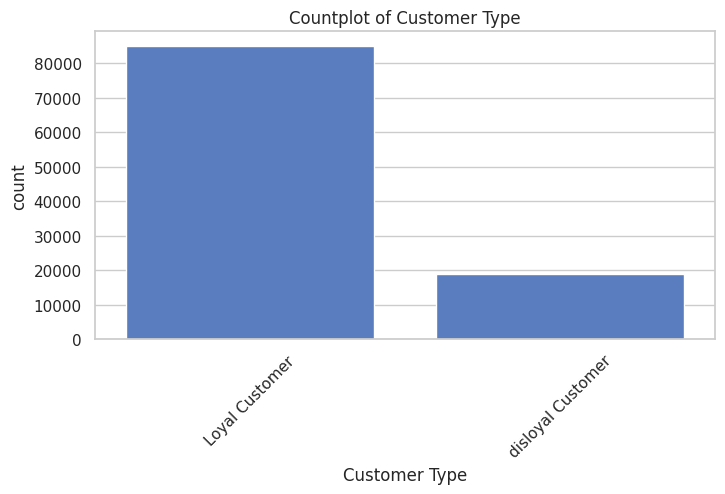

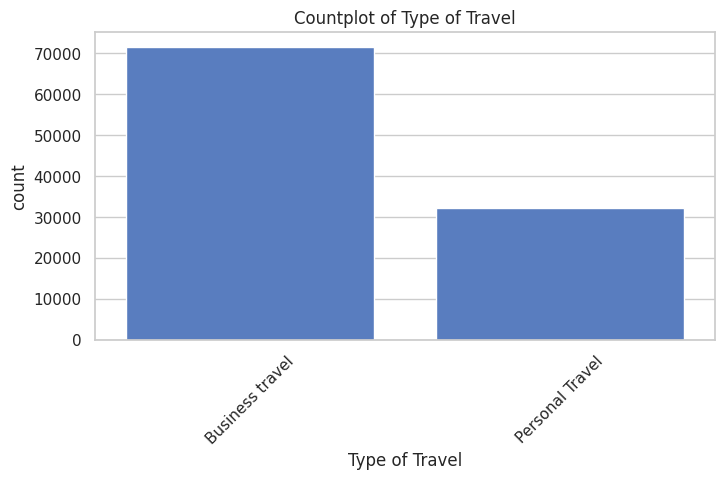

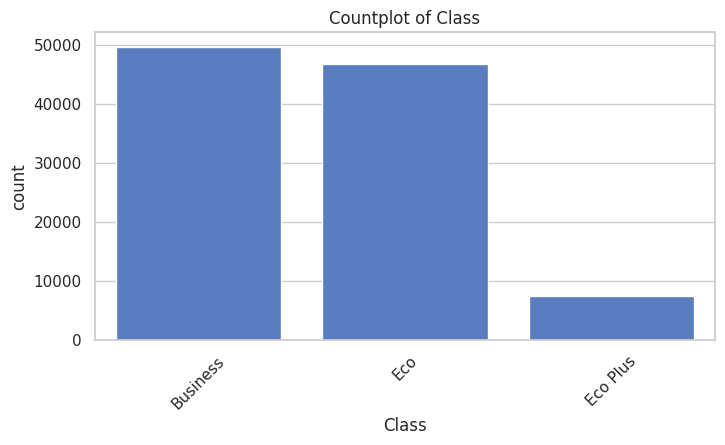

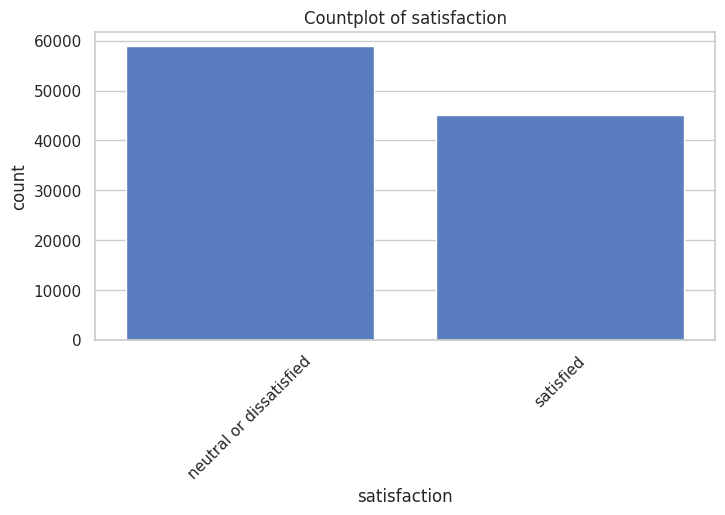

In [ ]:
# 4. Univariate Analysis
# Histograms for numerical features
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots for numerical features to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Bar plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()


Cross-tab: Gender vs Deley_Label
Deley_Label          0          1
Gender                           
Female       56.515637  43.484363
Male         56.410106  43.589894

Cross-tab: Customer Type vs Deley_Label
Deley_Label                0          1
Customer Type                          
Loyal Customer     56.511192  43.488808
disloyal Customer  56.250988  43.749012

Cross-tab: Type of Travel vs Deley_Label
Deley_Label              0          1
Type of Travel                       
Business travel  56.435699  43.564301
Personal Travel  56.525784  43.474216

Cross-tab: Class vs Deley_Label
Deley_Label          0          1
Class                            
Business     56.349542  43.650458
Eco          56.662745  43.337255
Eco Plus     55.978116  44.021884

Cross-tab: satisfaction vs Deley_Label
Deley_Label                      0          1
satisfaction                                 
neutral or dissatisfied  54.053228  45.946772
satisfied                59.615769  40.384231


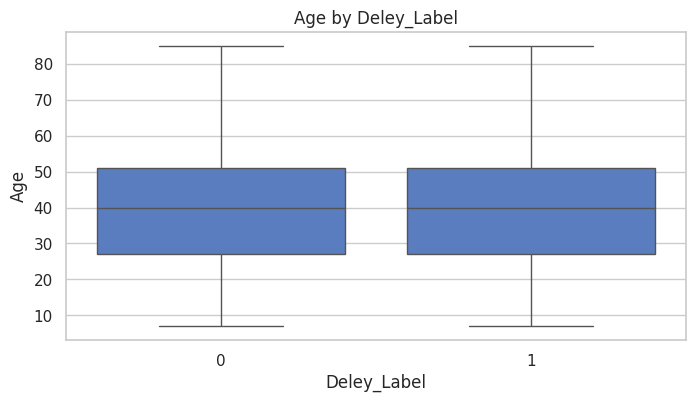

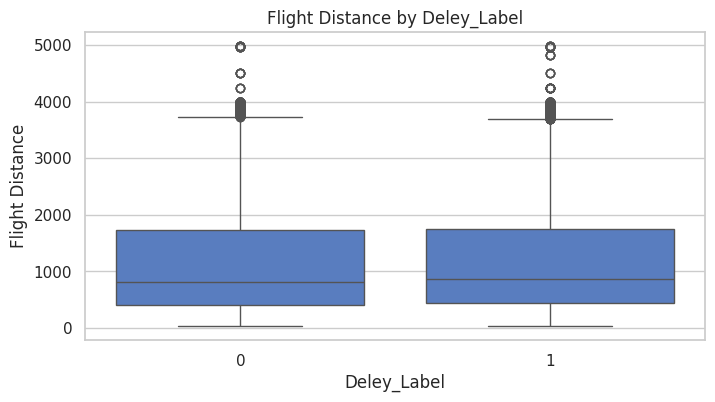

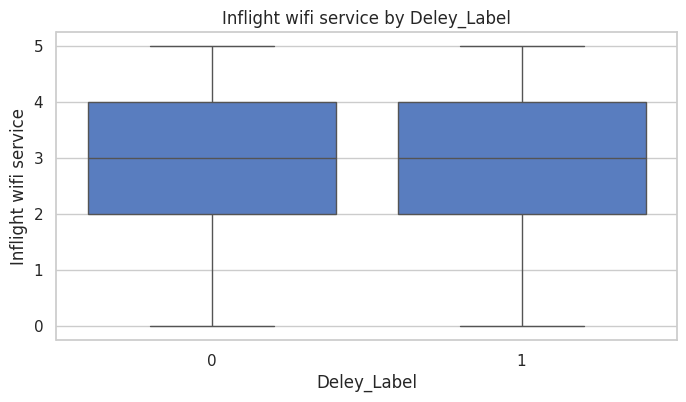

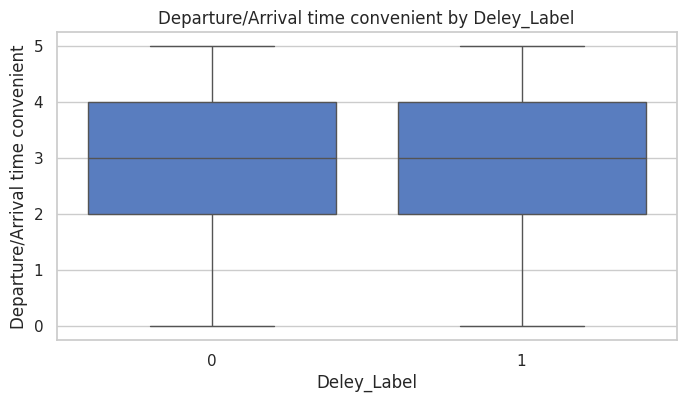

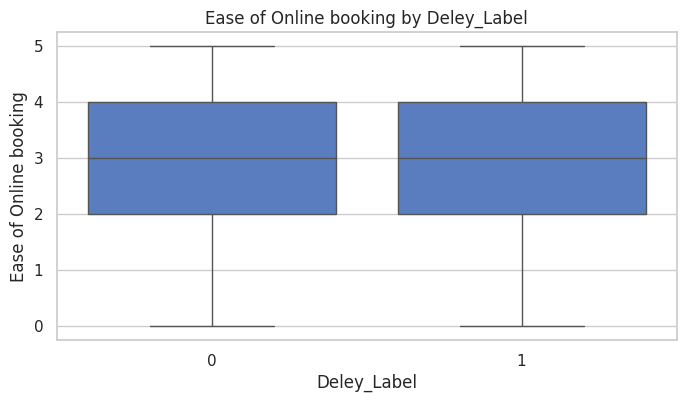

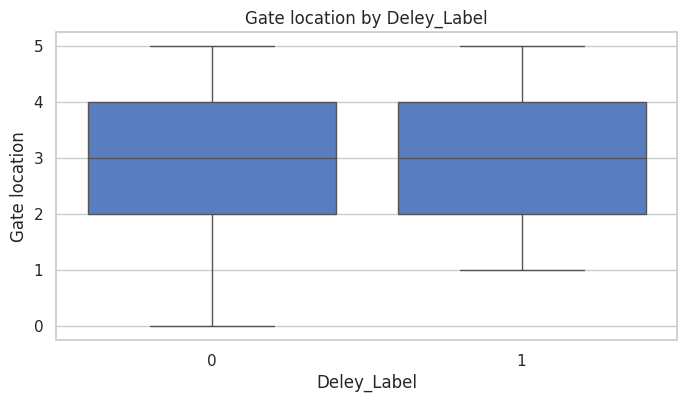

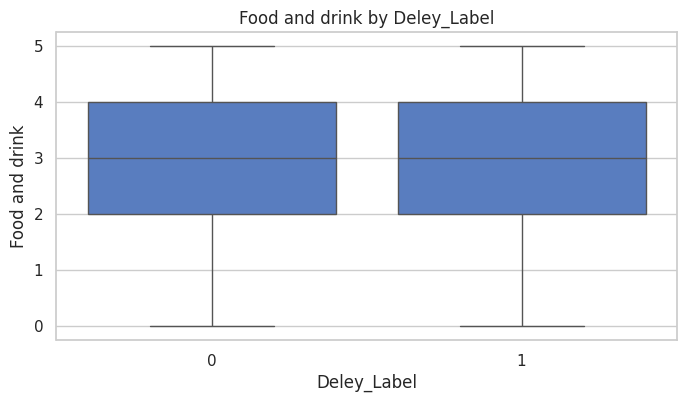

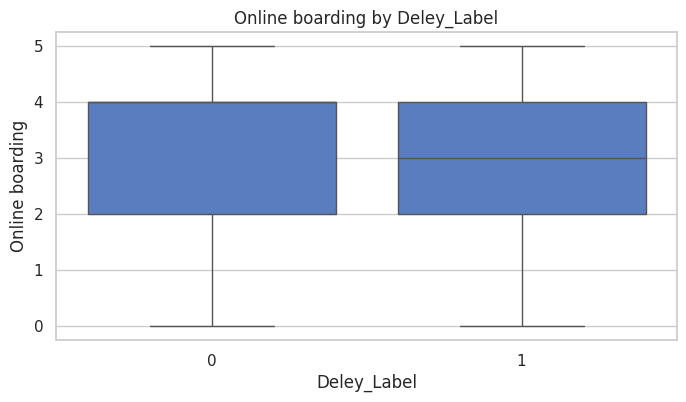

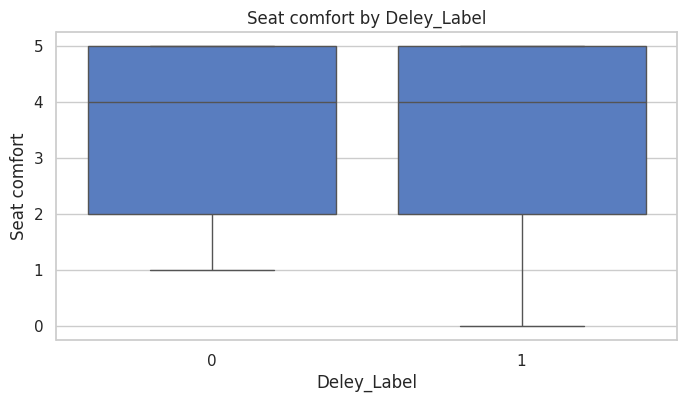

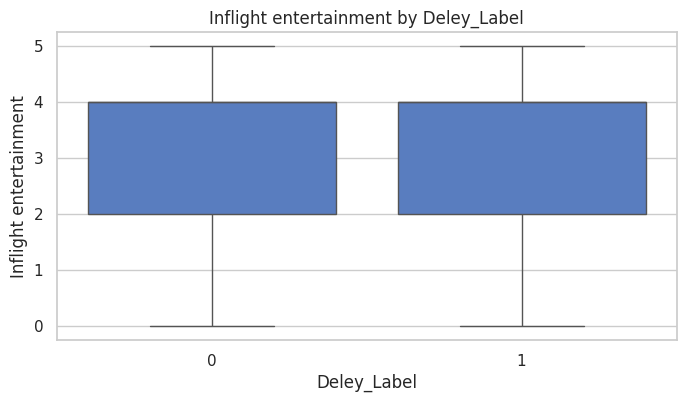

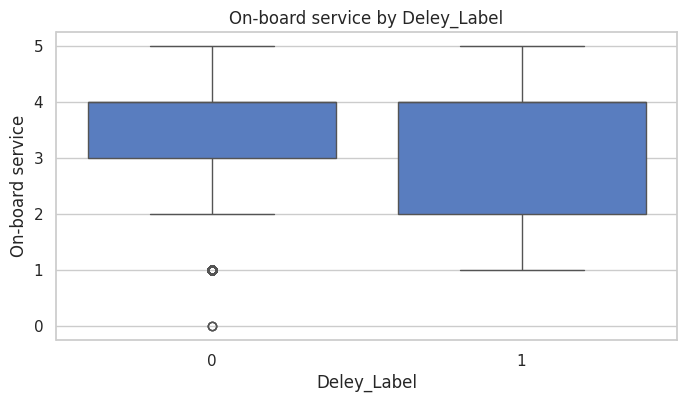

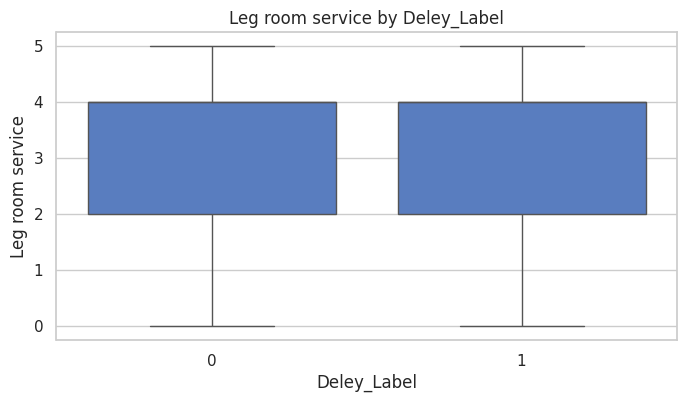

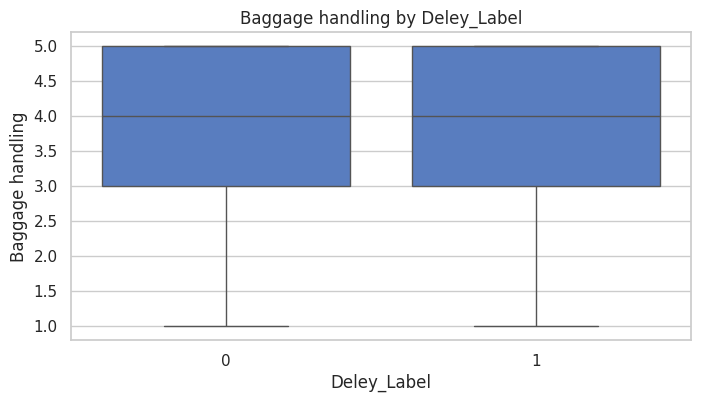

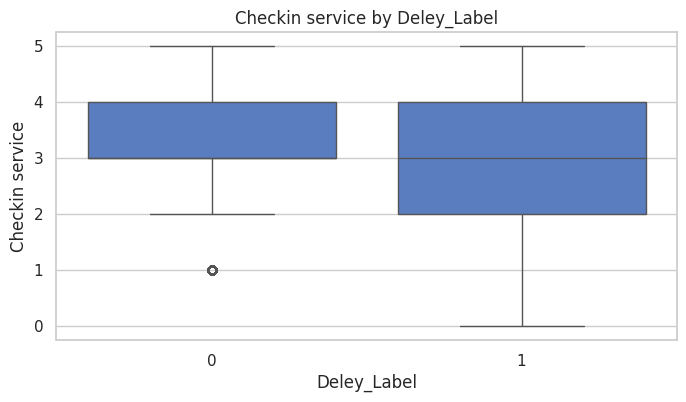

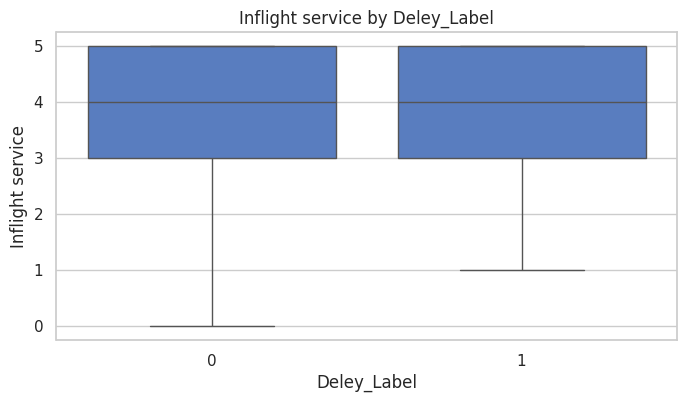

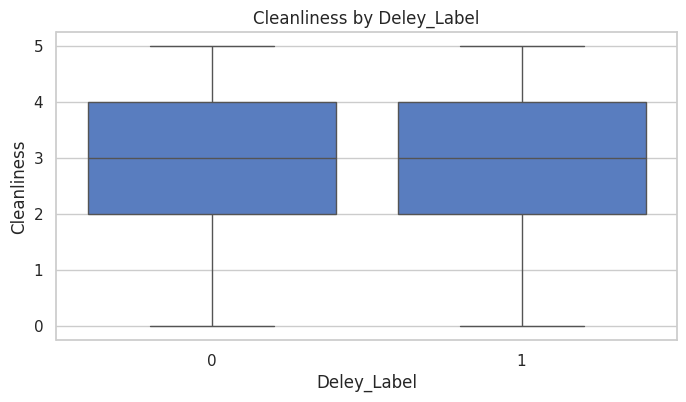

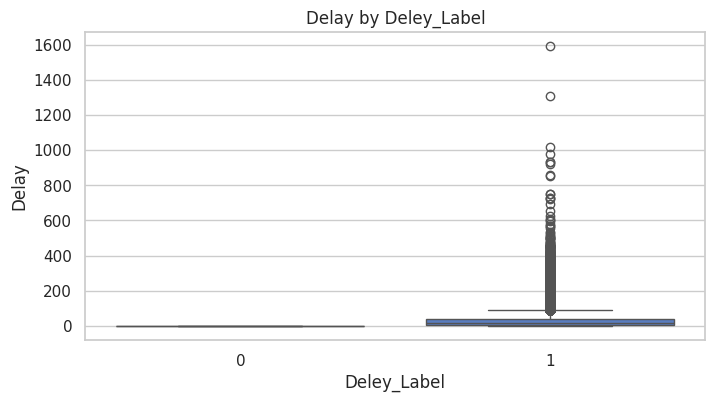

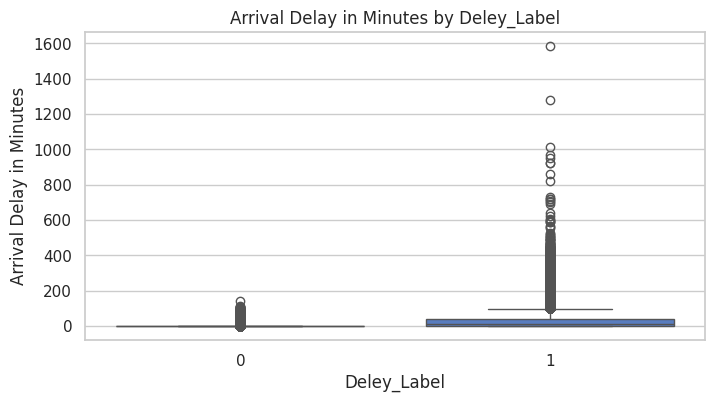

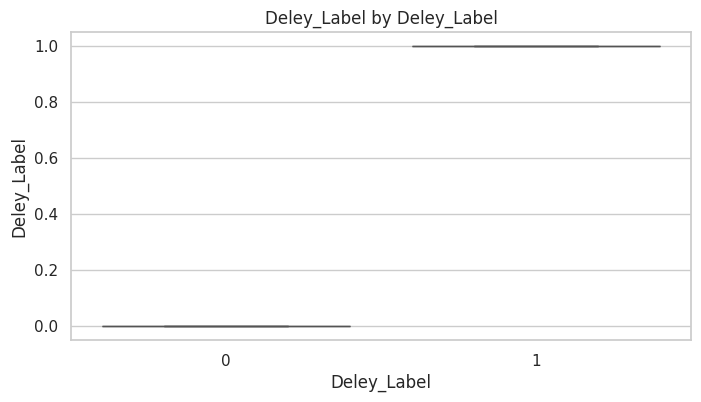

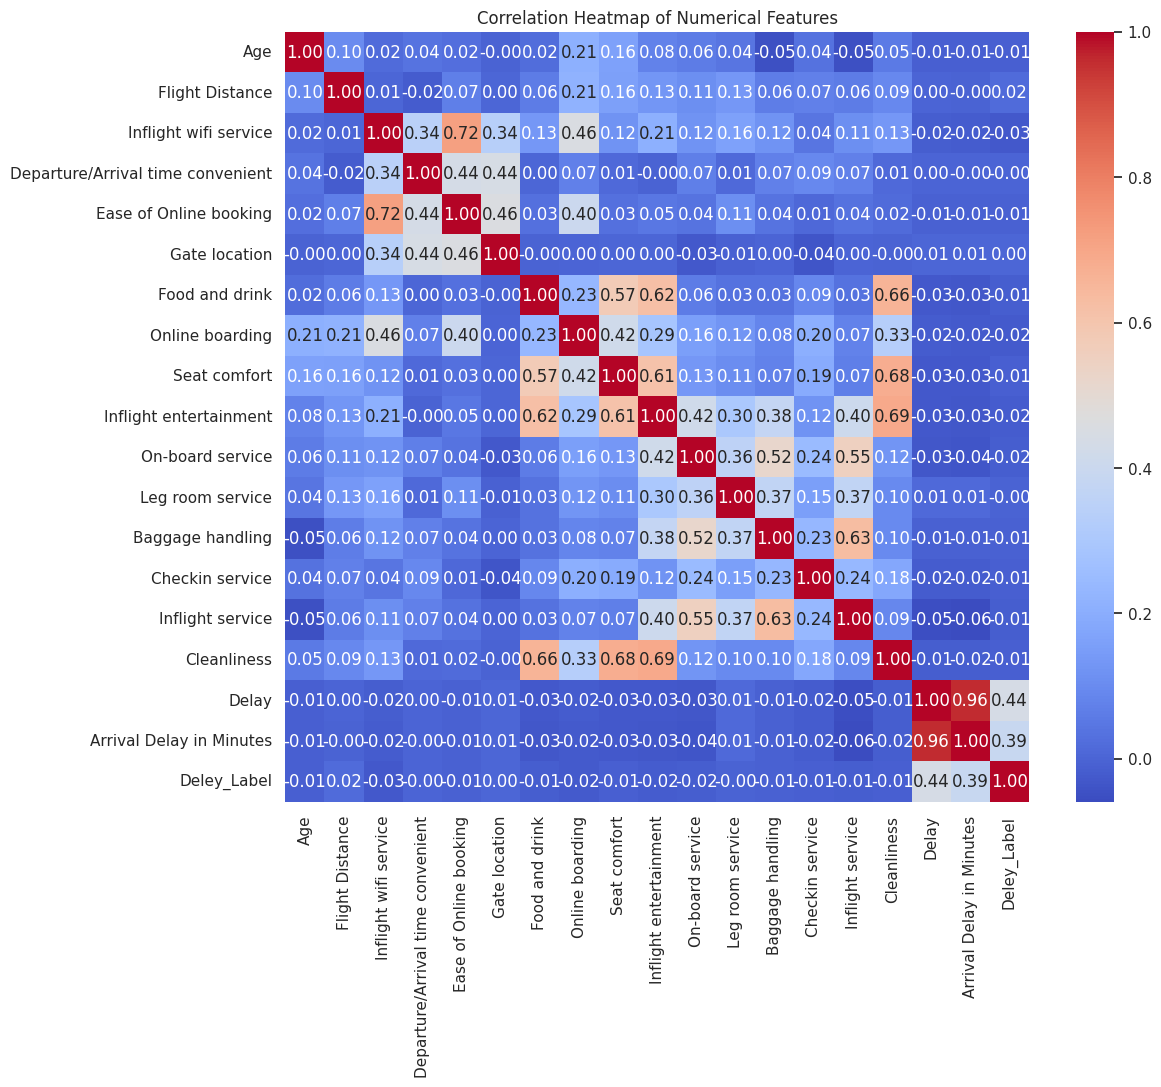


Chi-square test: Gender vs Deley_Label - p-value: 0.7363

Chi-square test: Customer Type vs Deley_Label - p-value: 0.5186

Chi-square test: Type of Travel vs Deley_Label - p-value: 0.7916

Chi-square test: Class vs Deley_Label - p-value: 0.4199

Chi-square test: satisfaction vs Deley_Label - p-value: 0.0000


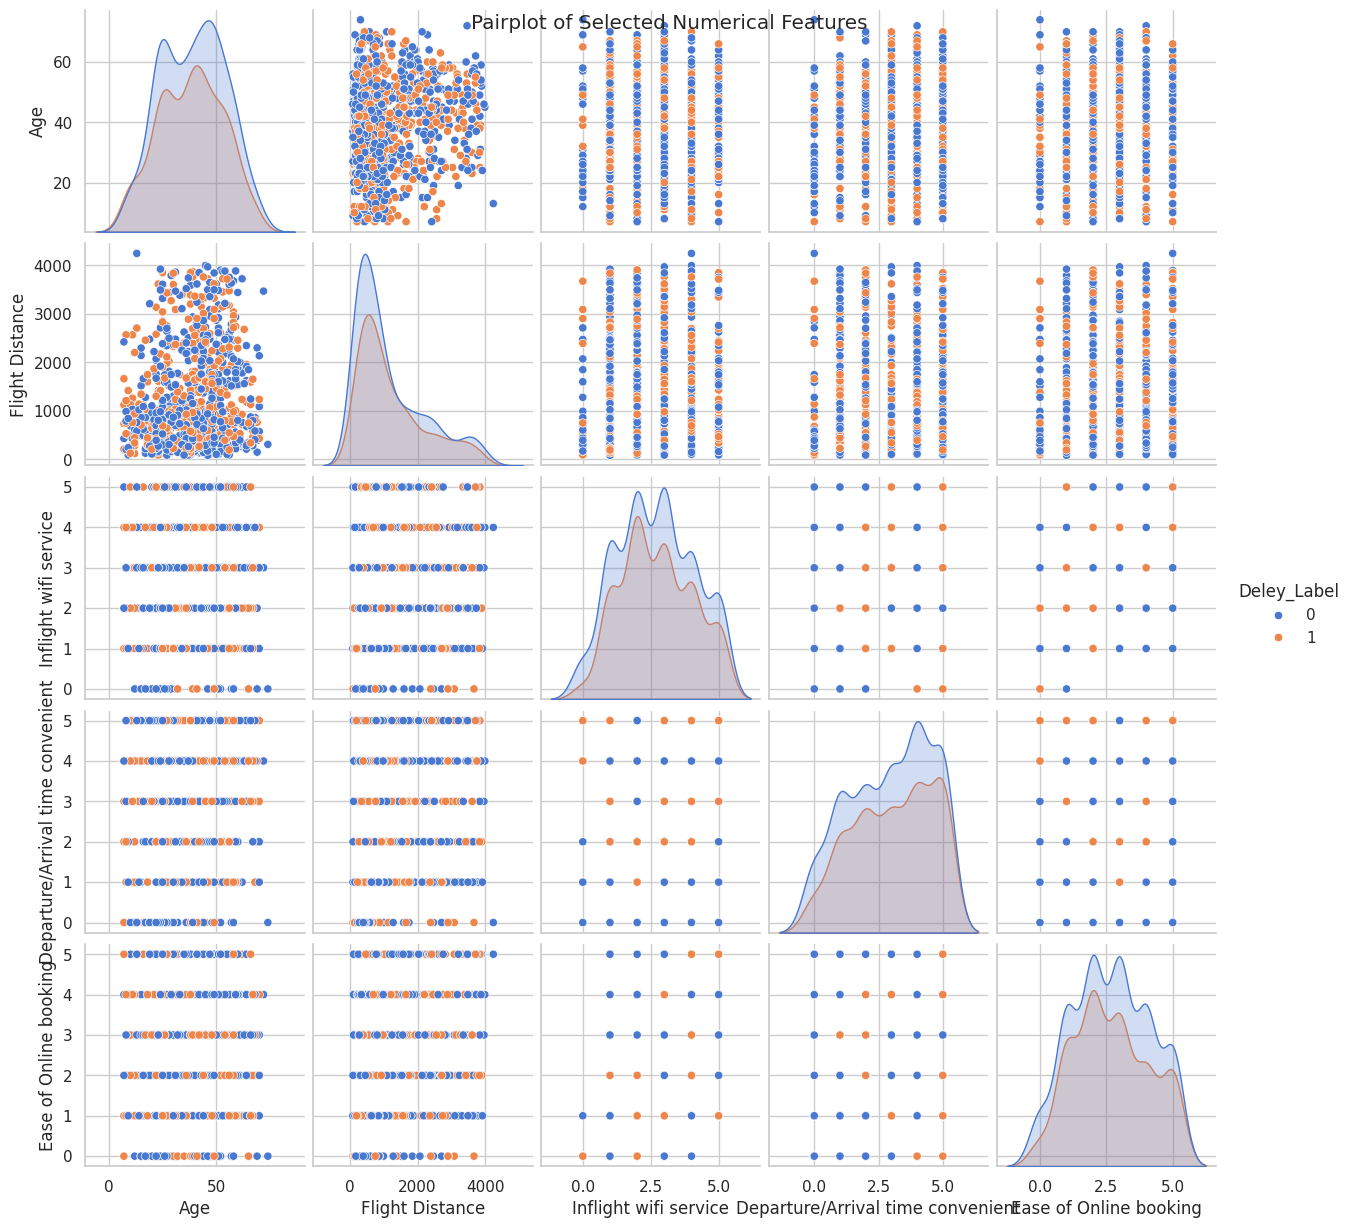


PCA Components: 1
Explained Variance Ratio: [0.99678614]


IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 800x600 with 0 Axes>

In [ ]:



# 5. Bivariate Analysis
# Target variable assumption: 'satisfaction' is the target
target = 'Deley_Label'

# Cross-tabulations with target
for col in categorical_cols:
    if col != target:
        print(f"\nCross-tab: {col} vs {target}")
        print(pd.crosstab(df[col], df[target], normalize='index') * 100)

# Boxplots of numerical features vs target
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[target], y=df[col])
    plt.title(f'{col} by {target}')
    plt.show()

# Correlation matrix for numerical features
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Chi-square test for categorical independence with target
for col in categorical_cols:
    if col != target:
        contingency = pd.crosstab(df[col], df[target])
        chi2, p, dof, ex = stats.chi2_contingency(contingency)
        print(f"\nChi-square test: {col} vs {target} - p-value: {p:.4f}")

# 6. Multivariate Analysis
# Pairplot (sample for performance; adjust as needed)
sns.pairplot(df.sample(1000)[numerical_cols[:5].tolist() + [target]], hue=target)
plt.suptitle('Pairplot of Selected Numerical Features')
plt.show()

# PCA for dimensionality reduction (on numerical features)
le = LabelEncoder()
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X_num = df_encoded[numerical_cols]
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_num)
print(f"\nPCA Components: {pca.n_components_}")
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualize PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_encoded[target])
plt.title('PCA Scatterplot (First 2 Components)')
plt.show()

# 7. Outlier Detection
# Using IQR method
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    outliers[col] = df[outlier_mask].shape[0]
print("\nOutliers per Numerical Column:", outliers)

# Z-score method (threshold 3)
z_scores = np.abs(stats.zscore(df[numerical_cols]))
outlier_mask_z = (z_scores > 3).any(axis=1)
print(f"Rows with outliers (Z-score > 3): {outlier_mask_z.sum()}")

# 8. Feature Engineering Ideas (Commented; implement as needed)
# # Create new features
# df['Total Delay'] = df['Delay'] + df['Arrival Delay in Minutes']
# df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, np.inf], labels=['Child', 'Young Adult', 'Adult', 'Senior', 'Elderly'])

# 9. Multicollinearity Check (VIF)
X_vif = df_encoded[numerical_cols]
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data.sort_values('VIF', ascending=False))




=== Outlier Removal ===
Rows removed due to outliers: 37641

=== Handling Missing Values ===

=== P-value Based Feature Selection ===
Numerical Features p-values:
                               Feature       p_value
17           Arrival Delay in Minutes  0.000000e+00
16                              Delay  0.000000e+00
1                     Flight Distance  8.633803e-27
14                   Inflight service  4.024391e-06
8                        Seat comfort  1.359386e-04
10                   On-board service  5.380388e-04
12                   Baggage handling  6.668204e-04
2               Inflight wifi service  7.271553e-04
13                    Checkin service  3.175954e-03
0                                 Age  4.055868e-03
15                        Cleanliness  4.194660e-03
9              Inflight entertainment  4.792193e-02
11                   Leg room service  1.130730e-01
4              Ease of Online booking  1.581731e-01
3   Departure/Arrival time convenient  2.018168e-01
6  

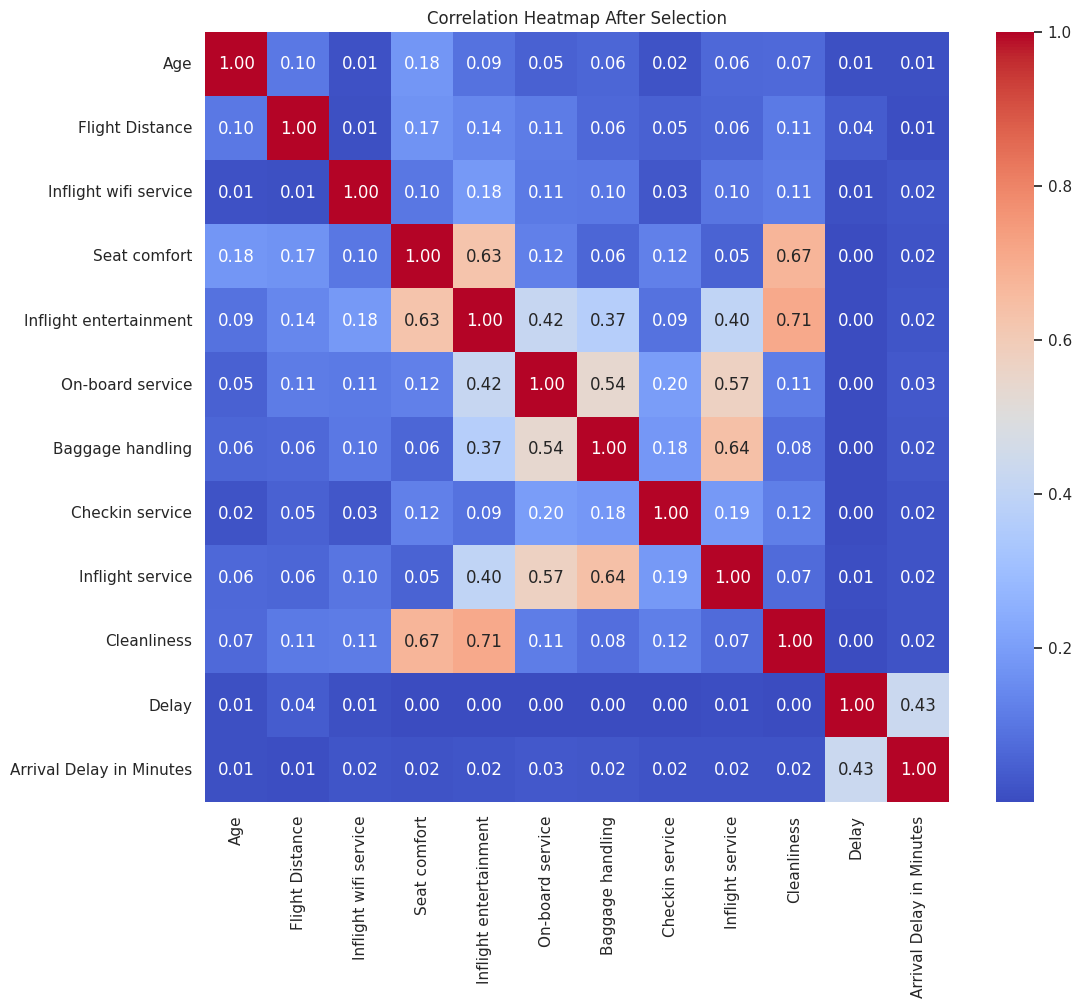

Dropping highly correlated features: []


/tmp/ipython-input-2668547402.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected.drop(to_drop, axis=1, inplace=True)



VIF After Correlation Fixing:
                      Feature        VIF
4     Inflight entertainment  24.948329
8           Inflight service  22.322326
6           Baggage handling  19.941726
9                Cleanliness  19.595428
3               Seat comfort  17.044401
5           On-board service  15.270417
7            Checkin service  13.530959
0                        Age   7.002866
2      Inflight wifi service   5.022168
1            Flight Distance   2.626220
11  Arrival Delay in Minutes   1.488637
10                     Delay   1.480576
Dropping high VIF features: ['Seat comfort', 'Inflight entertainment', 'On-board service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

=== PCA (Retain 95% Variance) ===
PCA Components: 5
Explained Variance Ratio: [0.28702602 0.22107254 0.19924893 0.17964365 0.11300885]

Final Features After PCA: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Class']

=== Preprocessing Completed ===

Final Features After PCA: ['PC1', 'PC2', 

/tmp/ipython-input-2668547402.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected.drop(high_vif, axis=1, inplace=True)


Target Distribution After SMOTE:
 Deley_Label
0    0.5
1    0.5
Name: proportion, dtype: float64

=== Preprocessing Completed ===


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


target = 'Deley_Label'
y = df[target]
X = df.drop(target, axis=1)

# Identify numerical and categorical columns (excluding target)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 1. Outlier Removal (using IQR method, remove rows with outliers in numerical columns)
print("\n=== Outlier Removal ===")
rows_before = X.shape[0]
for col in numerical_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove rows where value is outside bounds
    outlier_mask = (X[col] < lower_bound) | (X[col] > upper_bound)
    X = X[~outlier_mask]
    y = y[~outlier_mask]

rows_after = X.shape[0]
print(f"Rows removed due to outliers: {rows_before - rows_after}")
df_clean = pd.concat([X, y], axis=1)  # Update df if needed


# 2. Handling Missing Values (after outlier removal)
print("\n=== Handling Missing Values ===")
# Impute numerical missing values with median
for col in numerical_cols:
    if X[col].isnull().sum() > 0:
        median_val = X[col].median()
        X[col].fillna(median_val, inplace=True)
        print(f"Imputed '{col}' with median: {median_val}")

# Impute categorical missing values with mode (most frequent value)
for col in categorical_cols:
    if X[col].isnull().sum() > 0:
        mode_val = X[col].mode()[0]
        X[col].fillna(mode_val, inplace=True)
        print(f"Imputed '{col}' with mode: {mode_val}")


# 3. P-value Based Feature Selection
print("\n=== P-value Based Feature Selection ===")

# Encode categoricals for selection (use dummies for chi2)
X_encoded = X.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# For numerical features: use f_classif (ANOVA F-value)
if numerical_cols:
    selector_num = SelectKBest(f_classif, k='all')
    selector_num.fit(X_encoded[numerical_cols], y)
    p_values_num = pd.DataFrame({'Feature': numerical_cols, 'p_value': selector_num.pvalues_})
    print("Numerical Features p-values:\n", p_values_num.sort_values('p_value'))
    selected_num = p_values_num[p_values_num['p_value'] < 0.05]['Feature'].tolist()
else:
    selected_num = []

# For categorical features: use chi2
if categorical_cols:
    selector_cat = SelectKBest(chi2, k='all')
    selector_cat.fit(X_encoded[categorical_cols], y)
    p_values_cat = pd.DataFrame({'Feature': categorical_cols, 'p_value': selector_cat.pvalues_})
    print("Categorical Features p-values:\n", p_values_cat.sort_values('p_value'))
    selected_cat = p_values_cat[p_values_cat['p_value'] < 0.05]['Feature'].tolist()
else:
    selected_cat = []

# Selected features
selected_features = selected_num + selected_cat
print("\nSelected Features (p < 0.05):", selected_features)

# Update X to selected features
X_selected = X_encoded[selected_features]

# 4. Correlation Fixing (Handle Multicollinearity)
print("\n=== Correlation Fixing ===")

# Compute correlation matrix for selected numerical features
selected_num = [col for col in selected_num if col in selected_features]  # Update if needed
if selected_num:
    corr_matrix = X_selected[selected_num].corr().abs()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap After Selection')
    plt.show()

    # Remove highly correlated features (> 0.8)
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
    print("Dropping highly correlated features:", to_drop)
    X_selected.drop(to_drop, axis=1, inplace=True)

    # VIF Check after removal
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_selected[selected_num].columns  # Only numerical for VIF
    # Ensure only numerical columns are used for VIF calculation
    numerical_cols_after_corr = [col for col in X_selected.columns if col in numerical_cols]
    if numerical_cols_after_corr:
        vif_data['VIF'] = [variance_inflation_factor(X_selected[numerical_cols_after_corr].values, i) for i in range(len(numerical_cols_after_corr))]
        print("\nVIF After Correlation Fixing:\n", vif_data.sort_values('VIF', ascending=False))

        # Further remove if VIF > 10
        high_vif = vif_data[vif_data['VIF'] > 10]['Feature'].tolist()
        if high_vif:
            print("Dropping high VIF features:", high_vif)
            X_selected.drop(high_vif, axis=1, inplace=True)
    else:
        print("No numerical features remaining for VIF calculation.")


# Update selected features
selected_features = X_selected.columns.tolist()

# 5. PCA for Dimensionality Reduction (on numerical features, retain 95% variance)
print("\n=== PCA (Retain 95% Variance) ===")

# Separate current numerical after selection
current_num = [col for col in numerical_cols if col in selected_features]

if current_num:
    # Standardize numerical features
    scaler = StandardScaler()
    X_num_scaled = scaler.fit_transform(X_selected[current_num])

    # Apply PCA
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_num_scaled)
    print(f"PCA Components: {pca.n_components_}")
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)

    # Create DataFrame for PCA components
    pca_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
    X_pca_df = pd.DataFrame(X_pca, columns=pca_cols, index=X_selected.index)

    # Combine PCA with categorical selected features (if any)
    selected_cat = [col for col in categorical_cols if col in selected_features]
    X_final = pd.concat([X_pca_df, X_selected[selected_cat]], axis=1)
else:
    X_final = X_selected

print("\nFinal Features After PCA:", X_final.columns.tolist())

# Now X_final and y can be used for modeling (with imbalance handling as before)
print("\n=== Preprocessing Completed ===")

print("\nFinal Features After PCA:", X_final.columns.tolist())

# 6. Apply SMOTE to Handle Class Imbalance
print("\n=== Applying SMOTE ===")
print("Target Distribution Before SMOTE:\n", y.value_counts(normalize=True))
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_final, y)
print("Target Distribution After SMOTE:\n", pd.Series(y_res).value_counts(normalize=True))

# Now X_res and y_res are ready for modeling
print("\n=== Preprocessing Completed ===")

In [ ]:
X_res

,PC1,PC2,PC3,PC4,PC5,Class
0,-0.597858,-0.707667,-0.501797,-0.652721,0.006620,0
1,-0.726624,0.326289,0.112277,1.678366,0.104567,0
2,-0.636425,-0.565106,0.221569,-0.691490,-0.010078,1
3,-0.091943,1.408456,0.708951,-0.134385,0.510490,0
4,-0.589823,-0.345989,-1.292655,0.279165,0.059534,0
...,...,...,...,...,...,...
95973,1.962812,-0.785939,1.714972,-0.491498,1.245759,0
95974,1.656998,0.437040,1.747096,0.194262,2.398727,0
95975,-0.352660,-0.103570,-0.560077,0.516918,0.343967,1
95976,1.848932,-0.589415,-0.366474,0.422849,0.156815,1


In [ ]:
#Model Building

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

# Assuming x_res and y_res are your PCA components and target
# x_res = your PCA components
# y_res = your target variable

# Step 1: Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Step 2: Feature Scaling (important even after PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("="*70)
print("ADVANCED BINARY CLASSIFICATION MODELS")
print("="*70)

# Step 3: Individual Advanced Models
models = {}

# Model 1: XGBoost (Usually the best performer)
print("\n1. Training XGBoost...")
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=7,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_acc = accuracy_score(y_test, xgb_pred)
models['XGBoost'] = (xgb_model, xgb_acc)
print(f"   XGBoost Accuracy: {xgb_acc:.4f}")

# Model 2: LightGBM (Fast and accurate)
print("\n2. Training LightGBM...")
lgbm_model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=7,
    num_leaves=31,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    verbose=-1
)
lgbm_model.fit(X_train_scaled, y_train)
lgbm_pred = lgbm_model.predict(X_test_scaled)
lgbm_acc = accuracy_score(y_test, lgbm_pred)
models['LightGBM'] = (lgbm_model, lgbm_acc)
print(f"   LightGBM Accuracy: {lgbm_acc:.4f}")

# Model 3: Random Forest with optimized parameters
print("\n3. Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)
models['Random Forest'] = (rf_model, rf_acc)
print(f"   Random Forest Accuracy: {rf_acc:.4f}")

# Model 4: Gradient Boosting
print("\n4. Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
gb_acc = accuracy_score(y_test, gb_pred)
models['Gradient Boosting'] = (gb_model, gb_acc)
print(f"   Gradient Boosting Accuracy: {gb_acc:.4f}")

# Model 5: Deep Neural Network
print("\n5. Training Neural Network...")
nn_model = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size=32,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)
nn_model.fit(X_train_scaled, y_train)
nn_pred = nn_model.predict(X_test_scaled)
nn_acc = accuracy_score(y_test, nn_pred)
models['Neural Network'] = (nn_model, nn_acc)
print(f"   Neural Network Accuracy: {nn_acc:.4f}")

# Step 4: Ensemble - Voting Classifier (Soft Voting)
print("\n6. Training Voting Ensemble...")
voting_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('rf', rf_model),
        ('gb', gb_model),
        ('nn', nn_model)
    ],
    voting='soft',
    n_jobs=-1
)
voting_model.fit(X_train_scaled, y_train)
voting_pred = voting_model.predict(X_test_scaled)
voting_acc = accuracy_score(y_test, voting_pred)
models['Voting Ensemble'] = (voting_model, voting_acc)
print(f"   Voting Ensemble Accuracy: {voting_acc:.4f}")

# Step 5: Stacking Classifier (Meta-learner)
print("\n7. Training Stacking Ensemble...")
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('rf', rf_model),
        ('gb', gb_model)
    ],
    final_estimator=LogisticRegression(C=10, max_iter=1000),
    cv=5,
    n_jobs=-1
)
stacking_model.fit(X_train_scaled, y_train)
stacking_pred = stacking_model.predict(X_test_scaled)
stacking_acc = accuracy_score(y_test, stacking_pred)
models['Stacking Ensemble'] = (stacking_model, stacking_acc)
print(f"   Stacking Ensemble Accuracy: {stacking_acc:.4f}")

# Step 6: Find Best Model
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)
sorted_models = sorted(models.items(), key=lambda x: x[1][1], reverse=True)
for name, (model, acc) in sorted_models:
    print(f"{name:25s}: {acc:.4f} ({acc*100:.2f}%)")

best_model_name = sorted_models[0][0]
best_model, best_acc = sorted_models[0][1]

print("\n" + "="*70)
print(f"BEST MODEL: {best_model_name}")
print("="*70)

# Step 7: Detailed Evaluation of Best Model
best_pred = best_model.predict(X_test_scaled)
best_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

print(f"\nTest Accuracy: {best_acc:.4f}")
if best_proba is not None:
    print(f"ROC-AUC Score: {roc_auc_score(y_test, best_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, best_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, best_pred)
print(cm)

# Step 8: Cross-Validation Score
print("\n" + "="*70)
print("CROSS-VALIDATION SCORES (5-Fold)")
print("="*70)
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

# Step 9: Feature Importance (if available)
if hasattr(best_model, 'feature_importances_'):
    print("\n" + "="*70)
    print("TOP 10 MOST IMPORTANT FEATURES (PCA Components)")
    print("="*70)
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1][:10]
    for i, idx in enumerate(indices, 1):
        print(f"{i}. PC{idx+1}: {importances[idx]:.4f}")

print("\n" + "="*70)
print("TRAINING COMPLETE!")
print("="*70)
print(f"\nFinal Best Model: {best_model_name}")
print(f"Final Accuracy: {best_acc*100:.2f}%")

# Save the best model (optional)
# import joblib
# joblib.dump(best_model, 'best_classification_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')

ADVANCED BINARY CLASSIFICATION MODELS

1. Training XGBoost...
   XGBoost Accuracy: 0.9981

2. Training LightGBM...
   LightGBM Accuracy: 0.9984

3. Training Random Forest...
   Random Forest Accuracy: 0.9995

4. Training Gradient Boosting...
   Gradient Boosting Accuracy: 0.9998

5. Training Neural Network...
   Neural Network Accuracy: 1.0000

6. Training Voting Ensemble...
   Voting Ensemble Accuracy: 0.9999

7. Training Stacking Ensemble...
   Stacking Ensemble Accuracy: 0.9999

MODEL COMPARISON
Neural Network           : 1.0000 (100.00%)
Stacking Ensemble        : 0.9999 (99.99%)
Voting Ensemble          : 0.9999 (99.99%)
Gradient Boosting        : 0.9998 (99.98%)
Random Forest            : 0.9995 (99.95%)
LightGBM                 : 0.9984 (99.84%)
XGBoost                  : 0.9981 (99.81%)

BEST MODEL: Neural Network

Test Accuracy: 1.0000
ROC-AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
    confusion_matrix, classification_report, matthews_corrcoef,
    cohen_kappa_score, log_loss, brier_score_loss
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

# Assuming:
# best_model = your trained model
# X_train_scaled, X_test_scaled = your scaled features
# y_train, y_test = your target variables
# x_res, y_res = your original data (before train-test split)

def comprehensive_model_evaluation(model, X_train, X_test, y_train, y_test,
                                   X_original=None, y_original=None):
    """
    Comprehensive evaluation for models trained with SMOTE

    CRITICAL: When SMOTE is used, you must evaluate on ORIGINAL test data
    (not SMOTE-augmented data) to get true performance metrics
    """

    print("="*80)
    print("COMPREHENSIVE MODEL EVALUATION - SMOTE DATASET")
    print("="*80)

    # Get predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # ============================================================================
    # SECTION 1: BASIC METRICS (Be Cautious with 99% Accuracy!)
    # ============================================================================
    print("\n" + "="*80)
    print("1. BASIC CLASSIFICATION METRICS")
    print("="*80)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

    # ============================================================================
    # SECTION 2: ADVANCED METRICS (BEST FOR SMOTE DATASETS)
    # ============================================================================
    print("\n" + "="*80)
    print("2. ADVANCED METRICS (CRITICAL FOR SMOTE)")
    print("="*80)

    # Matthews Correlation Coefficient (BEST for imbalanced/SMOTE datasets)
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"\n✓ Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print("  Range: [-1, 1] | Best: 1 | Random: 0")
    print("  → MCC is THE BEST metric for SMOTE datasets!")
    print("  → Takes into account true/false positives AND negatives")

    # Cohen's Kappa (Agreement beyond chance)
    kappa = cohen_kappa_score(y_test, y_pred)
    print(f"\n✓ Cohen's Kappa: {kappa:.4f}")
    print("  Range: [-1, 1] | >0.8=Excellent | 0.6-0.8=Good | <0.6=Moderate")
    print("  → Measures agreement beyond random chance")

    # ROC-AUC (Robust to class imbalance)
    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"\n✓ ROC-AUC Score: {roc_auc:.4f}")
        print("  Range: [0, 1] | Best: 1 | Random: 0.5")
        print("  → Robust to class imbalance, best for ranking")

        # Precision-Recall AUC (Better than ROC for imbalanced)
        pr_auc = average_precision_score(y_test, y_proba)
        print(f"\n✓ Precision-Recall AUC (AP): {pr_auc:.4f}")
        print("  Range: [0, 1] | Best: 1")
        print("  → BETTER than ROC-AUC for imbalanced datasets")
        print("  → Focuses on positive class performance")

        # Brier Score (Calibration quality)
        brier = brier_score_loss(y_test, y_proba)
        print(f"\n✓ Brier Score: {brier:.4f}")
        print("  Range: [0, 1] | Best: 0 (lower is better)")
        print("  → Measures probability calibration quality")

        # Log Loss
        logloss = log_loss(y_test, y_proba)
        print(f"\n✓ Log Loss: {logloss:.4f}")
        print("  Range: [0, ∞] | Best: 0 (lower is better)")
        print("  → Penalizes confident wrong predictions")

    # ============================================================================
    # SECTION 3: CONFUSION MATRIX ANALYSIS
    # ============================================================================
    print("\n" + "="*80)
    print("3. CONFUSION MATRIX BREAKDOWN")
    print("="*80)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\nTrue Negatives (TN):  {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP):  {tp}")

    # Additional metrics from confusion matrix
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

    print(f"\nSpecificity (TNR):     {specificity:.4f} (True Negative Rate)")
    print(f"Negative Pred. Value:  {npv:.4f}")
    print(f"False Positive Rate:   {fpr:.4f}")
    print(f"False Negative Rate:   {fnr:.4f}")

    # Balanced Accuracy (Important for SMOTE)
    balanced_acc = (recall + specificity) / 2
    print(f"\n✓ Balanced Accuracy: {balanced_acc:.4f}")
    print("  → Average of sensitivity and specificity")
    print("  → CRITICAL for SMOTE datasets!")

    # ============================================================================
    # SECTION 4: CROSS-VALIDATION (On Original Data if Available)
    # ============================================================================
    print("\n" + "="*80)
    print("4. CROSS-VALIDATION ANALYSIS")
    print("="*80)

    if X_original is not None and y_original is not None:
        print("\n⚠️  WARNING: Evaluating on ORIGINAL data (before SMOTE)")
        print("   This gives TRUE generalization performance!")

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # Multiple scoring metrics
        scoring_metrics = {
            'accuracy': 'accuracy',
            'precision': 'precision',
            'recall': 'recall',
            'f1': 'f1',
            'roc_auc': 'roc_auc'
        }

        print("\n5-Fold Cross-Validation Scores:")
        print("-" * 60)

        for metric_name, metric in scoring_metrics.items():
            try:
                scores = cross_val_score(model, X_original, y_original,
                                       cv=cv, scoring=metric, n_jobs=-1)
                print(f"{metric_name.capitalize():12s}: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")
            except:
                pass

    # ============================================================================
    # SECTION 5: OVERFITTING CHECK
    # ============================================================================
    print("\n" + "="*80)
    print("5. OVERFITTING ANALYSIS")
    print("="*80)

    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy

    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy:     {test_accuracy:.4f}")
    print(f"Difference:        {abs(train_accuracy - test_accuracy):.4f}")

    if abs(train_accuracy - test_accuracy) > 0.05:
        print("\n⚠️  WARNING: Significant gap between train/test accuracy!")
        print("   Model may be overfitting. Consider:")
        print("   - Reducing model complexity")
        print("   - Adding regularization")
        print("   - More cross-validation")
    elif test_accuracy > 0.98:
        print("\n⚠️  WARNING: Suspiciously high accuracy (>98%)!")
        print("   This could indicate:")
        print("   - Data leakage (target info in features)")
        print("   - Test set contamination")
        print("   - Overfitting to SMOTE-generated data")
        print("   - Very easy problem (rare)")
    else:
        print("\n✓ Good balance between training and test performance")

    # ============================================================================
    # SECTION 6: DETAILED CLASSIFICATION REPORT
    # ============================================================================
    print("\n" + "="*80)
    print("6. DETAILED CLASSIFICATION REPORT")
    print("="*80)
    print("\n", classification_report(y_test, y_pred, digits=4))

    # ============================================================================
    # SECTION 7: VISUALIZATION
    # ============================================================================
    print("\n" + "="*80)
    print("7. GENERATING VISUALIZATIONS...")
    print("="*80)

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Confusion Matrix Heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    axes[0, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('True Label')
    axes[0, 0].set_xlabel('Predicted Label')

    # 2. ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        axes[0, 1].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC={roc_auc:.4f})')
        axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
        axes[0, 1].set_xlabel('False Positive Rate')
        axes[0, 1].set_ylabel('True Positive Rate')
        axes[0, 1].set_title('ROC Curve', fontsize=14, fontweight='bold')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # 3. Precision-Recall Curve
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
        axes[1, 0].plot(recall_curve, precision_curve, linewidth=2,
                       label=f'PR (AP={pr_auc:.4f})')
        axes[1, 0].set_xlabel('Recall')
        axes[1, 0].set_ylabel('Precision')
        axes[1, 0].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # 4. Prediction Distribution
        axes[1, 1].hist(y_proba[y_test == 0], bins=50, alpha=0.6, label='Negative', color='red')
        axes[1, 1].hist(y_proba[y_test == 1], bins=50, alpha=0.6, label='Positive', color='green')
        axes[1, 1].set_xlabel('Predicted Probability')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].set_title('Prediction Probability Distribution', fontsize=14, fontweight='bold')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('model_evaluation_report.png', dpi=300, bbox_inches='tight')
    print("✓ Visualizations saved as 'model_evaluation_report.png'")
    plt.show()

    # ============================================================================
    # SECTION 8: FINAL RECOMMENDATIONS
    # ============================================================================
    print("\n" + "="*80)
    print("8. BEST METRICS FOR YOUR SMOTE DATASET")
    print("="*80)

    print("\n🏆 RECOMMENDED METRICS (In Order of Importance):")
    print("\n1. Matthews Correlation Coefficient (MCC)")
    print(f"   Value: {mcc:.4f}")
    print("   → BEST overall metric for SMOTE/imbalanced datasets")
    print("   → Considers all confusion matrix elements")

    if y_proba is not None:
        print("\n2. Precision-Recall AUC (Average Precision)")
        print(f"   Value: {pr_auc:.4f}")
        print("   → Better than ROC-AUC for imbalanced data")
        print("   → Focuses on minority class performance")

        print("\n3. ROC-AUC Score")
        print(f"   Value: {roc_auc:.4f}")
        print("   → Good for ranking and threshold selection")

    print("\n4. F1-Score")
    print(f"   Value: {f1:.4f}")
    print("   → Harmonic mean of precision and recall")

    print("\n5. Cohen's Kappa")
    print(f"   Value: {kappa:.4f}")
    print("   → Agreement beyond random chance")

    print("\n6. Balanced Accuracy")
    print(f"   Value: {balanced_acc:.4f}")
    print("   → Average of sensitivity and specificity")

    print("\n" + "="*80)
    print("⚠️  CRITICAL WARNINGS FOR KAGGLE SUBMISSION:")
    print("="*80)
    print("\n1. 99% accuracy with SMOTE is SUSPICIOUS!")
    print("   - Validate on ORIGINAL test set (not SMOTE data)")
    print("   - Check for data leakage")
    print("   - Use cross-validation on original data")

    print("\n2. For Kaggle, use:")
    print("   - MCC for primary evaluation")
    print("   - F1-Score as secondary")
    print("   - ROC-AUC for ranking")

    print("\n3. Always report:")
    print("   - Confusion matrix")
    print("   - Precision AND Recall (not just accuracy)")
    print("   - Cross-validation scores")

    print("\n" + "="*80)

    # Return all metrics as dictionary
    metrics_dict = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'mcc': mcc,
        'cohens_kappa': kappa,
        'balanced_accuracy': balanced_acc,
        'specificity': specificity
    }

    if y_proba is not None:
        metrics_dict.update({
            'roc_auc': roc_auc,
            'pr_auc': pr_auc,
            'brier_score': brier,
            'log_loss': logloss
        })

    return metrics_dict

# ============================================================================


In [ ]:

""
# After training your model with SMOTE:
metrics = comprehensive_model_evaluation(
    model=nn_model,                    # Your trained model
    X_train=X_train_scaled,              # Training features (with SMOTE)
    X_test=X_test_scaled,                # Test features (without SMOTE)
    y_train=y_train,                     # Training labels (with SMOTE)
    y_test=y_test,                       # Test labels (without SMOTE)
    X_original=X_res,                    # Original features (before split)
    y_original=y_res                     # Original labels (before split)
)

# Access individual metrics
print(f"MCC: {metrics['mcc']:.4f}")


COMPREHENSIVE MODEL EVALUATION - SMOTE DATASET

1. BASIC CLASSIFICATION METRICS
Accuracy:  1.0000 (100.00%)
Precision: 1.0000 (100.00%)
Recall:    1.0000 (100.00%)
F1-Score:  1.0000 (100.00%)

2. ADVANCED METRICS (CRITICAL FOR SMOTE)

✓ Matthews Correlation Coefficient (MCC): 1.0000
  Range: [-1, 1] | Best: 1 | Random: 0
  → MCC is THE BEST metric for SMOTE datasets!
  → Takes into account true/false positives AND negatives

✓ Cohen's Kappa: 1.0000
  Range: [-1, 1] | >0.8=Excellent | 0.6-0.8=Good | <0.6=Moderate
  → Measures agreement beyond random chance

✓ ROC-AUC Score: 1.0000
  Range: [0, 1] | Best: 1 | Random: 0.5
  → Robust to class imbalance, best for ranking

✓ Precision-Recall AUC (AP): 1.0000
  Range: [0, 1] | Best: 1
  → BETTER than ROC-AUC for imbalanced datasets
  → Focuses on positive class performance

✓ Brier Score: 0.0000
  Range: [0, 1] | Best: 0 (lower is better)
  → Measures probability calibration quality

✓ Log Loss: 0.0000
  Range: [0, ∞] | Best: 0 (lower is bett